In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

# The Constant Model

A transit rider, Jake, often takes the northbound C bus at the 3rd \& Pike
bus stop in downtown Seattle [^jake]. The bus is supposed to arrive every 10
minutes, but Jake notices that he sometimes waits a long time for the bus. He
wants to know how late the bus usually is. 
Jake was able to acquire the scheduled arrival and actual arrival times,
from the Washington State Transportation Center so that he can 
calculate the minutes that each bus is late for his stop. We read in these data.

[^jake]: We (the authors) first learned of the bus arrival time data from an
    analysis by a data scientist named Jake VanderPlas. We've named the
    protagonist of this section in his honor. https://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/

In [2]:
times = pd.read_csv('data/seattle_bus_times_NC.csv')
times

,route,direction,scheduled,actual,minutes_late
0,C,northbound,2016-03-26 06:30:28,2016-03-26 06:26:04,-4.40
1,C,northbound,2016-03-26 01:05:25,2016-03-26 01:10:15,4.83
2,C,northbound,2016-03-26 21:00:25,2016-03-26 21:05:00,4.58
...,...,...,...,...,...
1431,C,northbound,2016-04-10 06:15:28,2016-04-10 06:11:37,-3.85
1432,C,northbound,2016-04-10 17:00:28,2016-04-10 16:56:54,-3.57
1433,C,northbound,2016-04-10 20:15:25,2016-04-10 20:18:21,2.93


The `minutes_late` column in the data table records how late each bus was.
Notice that some of the times are negative, which means that the bus arrived
early. Let's plot a histogram of the minutes each bus is late. 

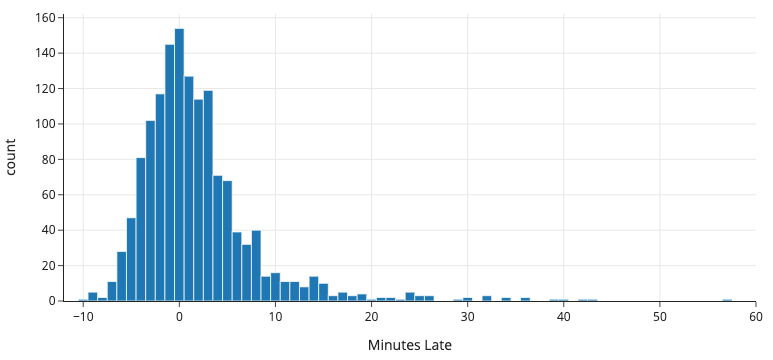

In [3]:
fig = px.histogram(times, x='minutes_late', width=350, height=250)
fig.update_xaxes(range=[-12, 60], title_text='Minutes Late')

There are already some interesting patterns in the data. For example, many
buses arrive earlier than scheduled and some are well over 20 minutes late. We
also see a clear mode (high point) at 0, meaning many buses arrive roughly on
time.

To understand how late the bus usually is, we'd like to
summarize the lateness by a constant---this is a statistic, a single number, like the mean,
median, or mode. Let's find each of these summary statistics for the
`minutes_late` data.

From the histogram, we estimate the mode of the data to be 0. We use
Python to compute the mean and median.

In [4]:
print(f"mean:    {times['minutes_late'].mean():.2f} mins late")
print(f"median:  {times['minutes_late'].median():.2f} mins late")
print(f"mode:    {0:.2f} mins late")

mean:    1.92 mins late
median:  0.74 mins late
mode:    0.00 mins late


Naturally, we want to know which of these numbers is best as a summary of lateness. 
Rather than relying on rules of thumb, we take a more formal approach. We make a constant model for bus lateness. Let's call this constant $ \theta $ (in modeling, $\theta$ is often referred to as a *parameter*). For example,
if we say that $ \theta = 5 $, our model's best guess is that the bus will typically be 5
minutes late.

Now, $ \theta = 5 $ isn't a particularly good guess. From the histogram of
arrival times, we saw that there are a lot more points closer to 0 than 5. But it
isn't clear that $\theta = 0$ (the mode) is a better choice than
$\theta = 0.74$ (the median), $ \theta = 1.92 $ (the mean), or something in
between.
To make precise choices between different values of $ \theta $, we would like to
assign each value of $\theta$ a score that measures how well the model fits the
data. Using more formal language, 
we say that we use a *loss function* to pick the best parameter,
$\theta$, for a constant model of our data. 
A loss function takes as input a value of $ \theta $
and the points in our dataset. It outputs a single number that we can use to
select the best $ \theta $. In the next section, we examine how to define and
use loss functions to fit this constant model.